In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [2]:
%matplotlib inline

# Preparing Data

In [3]:
test_counts = {'yes': 256, 'no': 252, 'up': 272, 'down': 253, 'left': 267, 'right': 259, 'on': 246, 'off': 262, 'stop': 249, 'go': 251}
param_counts = {
    'cnn_one_fstride4': {
        'params': 220000,
        'multiplies': 1430000
    },
    'cnn_one_fstride8': {
        'params': 337000,
        'multiplies': 1430000
    },
    'cnn_tpool2': {
        'params': 1090000,
        'multiplies': 103000000
    },
    'cnn_tpool3': {
        'params': 823000,
        'multiplies': 73700000
    },
    'cnn_trad_fpool3': {
        'params': 1370000,
        'multiplies': 125000000
    },
    'google-speech-dataset-compact': {
        'params': 964000,
        'multiplies': 5760000
    },
    'google-speech-dataset-full': {
        'params': 1380000,
        'multiplies': 98800000
    }
}

In [4]:
def get_observations(fname):
    observations = {'model': [], 'keyword': [], 'accuracy': [], 'time': [], 'total_energy': [], 'peak_power': [], 'params': [], 'multiplies': []}
    with open(fname, 'r') as f:
        for _ in range(7):
            for i in range(10):
                line = f.readline().rstrip()
                parts = line.split(' ')
                model, keyword, accuracy, time, total_energy, peak_power = parts
                model = model.rstrip('\.onnx')
                accuracy, time, total_energy, peak_power = list(map(float, [accuracy, time, total_energy, peak_power]))
                accuracy *= 100
                total_energy = 1000 * (total_energy - 1.9*time)
                time *= 1000
                peak_power -= 1.9
                observations['model'].append(model)
                observations['keyword'].append(keyword)
                observations['accuracy'].append(accuracy)
                observations['time'].append(time / test_counts[keyword])
                observations['total_energy'].append(total_energy / test_counts[keyword])
                observations['peak_power'].append(peak_power)
                observations['params'].append(param_counts[model]['params'])
                observations['multiplies'].append(param_counts[model]['multiplies'])

            for i in range(6):
                line = f.readline()
    
    return observations

In [6]:
df = pd.DataFrame(get_observations('experiment_output_e2e.txt'))

In [7]:
df.head()

,accuracy,keyword,model,multiplies,params,peak_power,time,total_energy
0,90.6,yes,cnn_trad_fpool3,125000000,1370000,2.2,228.125000,430.625000
1,82.9,no,cnn_trad_fpool3,125000000,1370000,2.2,229.365079,431.666667
2,91.5,up,cnn_trad_fpool3,125000000,1370000,2.2,229.411765,438.750000
3,92.1,down,cnn_trad_fpool3,125000000,1370000,2.2,227.272727,434.584980
4,90.3,left,cnn_trad_fpool3,125000000,1370000,2.2,224.719101,426.966292


In [8]:
df_pre = pd.DataFrame(get_observations('experiment_output_preprocessing.txt'))
df_pre.head()

,accuracy,keyword,model,multiplies,params,peak_power,time,total_energy
0,0.0,yes,cnn_one_fstride4,1430000,220000,0.8,30.468750,18.281250
1,0.0,no,cnn_one_fstride4,1430000,220000,0.8,30.555556,20.119048
2,0.0,up,cnn_one_fstride4,1430000,220000,0.8,30.514706,14.816176
3,0.0,down,cnn_one_fstride4,1430000,220000,0.8,30.830040,18.498024
4,0.0,left,cnn_one_fstride4,1430000,220000,0.8,30.337079,25.131086


# Analysis

In [9]:
df_grouped = df.groupby('model')

In [10]:
df_grouped_means = df_grouped['accuracy', 'total_energy', 'peak_power', 'time', 'params', 'multiplies'].mean()

In [11]:
df_grouped_means.round(2)

,accuracy,total_energy,peak_power,time,params,multiplies
model,,,,,,
cnn_one_fstride4,70.28,28.11,0.99,40.47,220000,1430000
cnn_one_fstride8,67.90,28.74,1.02,42.14,337000,1430000
cnn_tpool2,91.97,384.05,2.21,204.28,1090000,103000000
cnn_tpool3,91.23,278.86,2.16,158.75,823000,73700000
cnn_trad_fpool3,89.43,431.10,2.20,227.07,1370000,125000000
google-speech-dataset-compact,77.06,115.07,1.52,99.94,964000,5760000
google-speech-dataset-full,87.51,305.88,2.60,145.52,1380000,98800000


In [12]:
df_pre_grouped = df_pre.groupby('model')
df_pre_grouped_means = df_pre_grouped['accuracy', 'total_energy', 'peak_power', 'time', 'params', 'multiplies'].mean()
df_pre_grouped_means

,accuracy,total_energy,peak_power,time,params,multiplies
model,,,,,,
cnn_one_fstride4,0.0,18.325887,0.79,30.503119,220000,1430000
cnn_one_fstride8,0.0,18.419090,0.80,30.350051,337000,1430000
cnn_tpool2,0.0,19.148509,0.79,30.890965,1090000,103000000
cnn_tpool3,0.0,19.175226,0.79,30.774251,823000,73700000
cnn_trad_fpool3,0.0,19.608814,0.83,31.324518,1370000,125000000
google-speech-dataset-compact,0.0,20.942512,0.82,32.021820,964000,5760000
google-speech-dataset-full,0.0,18.699125,0.81,31.048824,1380000,98800000


In [13]:
df_pre_grouped_means['time'].mean()

30.98764959198933

In [14]:
df_pre_grouped_means['total_energy'].mean()

19.188451964409353

In [15]:
df_pre_grouped_means['peak_power'].mean()

0.8042857142857146

In [16]:
df_inf_only = df_grouped_means - df_pre_grouped_means
df_inf_only['peak_power'] = df_grouped_means['peak_power']
df_inf_only['params'] = df_grouped_means['params']
df_inf_only['multiplies'] = df_grouped_means['multiplies']
df_inf_only.round(2)

,accuracy,total_energy,peak_power,time,params,multiplies
model,,,,,,
cnn_one_fstride4,70.28,9.79,0.99,9.97,220000,1430000
cnn_one_fstride8,67.90,10.32,1.02,11.79,337000,1430000
cnn_tpool2,91.97,364.90,2.21,173.39,1090000,103000000
cnn_tpool3,91.23,259.69,2.16,127.97,823000,73700000
cnn_trad_fpool3,89.43,411.49,2.20,195.75,1370000,125000000
google-speech-dataset-compact,77.06,94.12,1.52,67.92,964000,5760000
google-speech-dataset-full,87.51,287.18,2.60,114.47,1380000,98800000


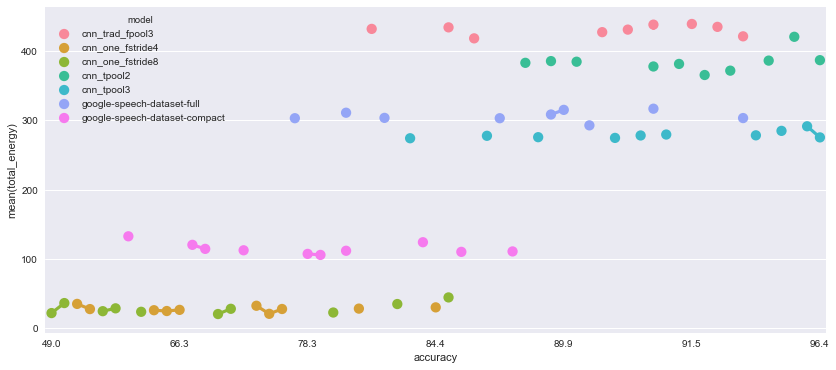

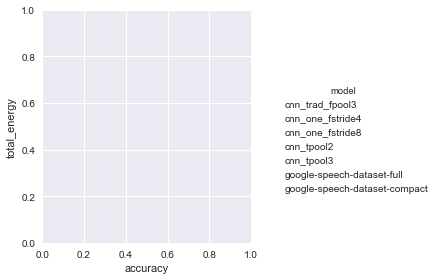

In [17]:
dims = (14, 6)
fig, ax = plt.subplots(figsize=dims)
g = sns.factorplot(x="accuracy", y="total_energy", hue="model", data=df, ax=ax)
g.set(xlim=(0, None), ylim=(0, None))
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# Visualizations

## Energy vs. Multiplies

In [18]:
df_inf_aggregated = df_inf_only.reset_index()

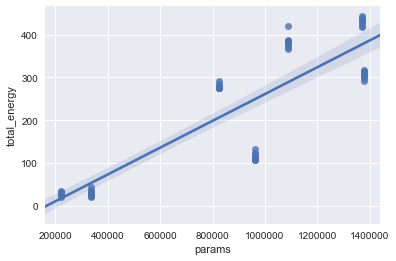

In [19]:
ax = sns.regplot(x=df['params'], y=df['total_energy'])

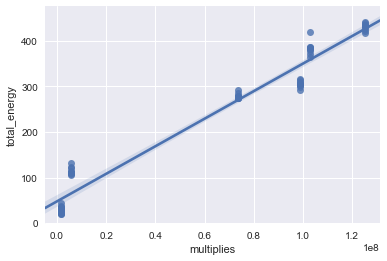

In [20]:
ax = sns.regplot(x=df['multiplies'], y=df['total_energy'])

In [21]:
df.to_csv('observations.csv', index=False)

In [22]:
df_inf_aggregated.to_csv('observations_agg.csv', index=False)